In [1]:
Data_Path = r'D:\AI\Stack Overflow Developer Survey 2024\data\raw\survey_results_public.csv'
Export_Path = r'D:\AI\Stack Overflow Developer Survey 2024\data\processed\1_preprocessed_df.pkl'

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
raw_df = pd.read_csv(Data_Path)
df = raw_df.copy()

In [6]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

# Drop unnecessary columns

In [8]:
remained_cols = ['YearsCodePro',
 'DevType','Country','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith','EmbeddedHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith',
 'NEWCollabToolsHaveWorkedWith','OpSysPersonal use','OpSysProfessional use','OfficeStackAsyncHaveWorkedWith',
 'OfficeStackSyncHaveWorkedWith','AISearchDevHaveWorkedWith','WorkExp']
df = df[remained_cols]

In [9]:
df.head()

,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchDevHaveWorkedWith,WorkExp
0,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,Microsoft Teams;Slack,NaN,17.0
2,27,Developer Experience,United Kingdom of Great Britain and Northern I...,C#,Firebase Realtime Database,Google Cloud,ASP.NET CORE,Rasberry Pi,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild,Visual Studio,Windows,Windows,NaN,Google Chat;Google Meet;Microsoft Teams;Zoom,NaN,NaN
3,NaN,"Developer, full-stack",Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,Rasberry Pi,NumPy;Pandas;Ruff;TensorFlow,Docker;npm;Pip,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Developer, full-stack",Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,CMake;Cargo;Rasberry Pi,NaN,APT;Make;npm,Vim,Other (please specify):,NaN,GitHub Discussions;Markdown File;Obsidian;Stac...,Discord;Whatsapp,NaN,NaN


In [10]:
df.shape

(65437, 17)

# Duplicates

In [20]:
df.duplicated().sum()

4257

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(61180, 17)

# Null values

In [27]:
df.isnull().sum()

YearsCodePro                      10250
DevType                            2412
Country                            2372
LanguageHaveWorkedWith             1492
DatabaseHaveWorkedWith            10931
PlatformHaveWorkedWith            18815
WebframeHaveWorkedWith            16019
EmbeddedHaveWorkedWith            38967
MiscTechHaveWorkedWith            21737
ToolsTechHaveWorkedWith            8698
NEWCollabToolsHaveWorkedWith       3588
OpSysPersonal use                  3008
OpSysProfessional use              8209
OfficeStackAsyncHaveWorkedWith    13087
OfficeStackSyncHaveWorkedWith      5635
AISearchDevHaveWorkedWith         16727
WorkExp                           31522
dtype: int64

In [45]:
# check number of rows with all columns contain null values
df[df.isnull().sum(axis=1) == 17].shape[0]

1

In [ ]:
df.drop(index = df[df.isnull().sum(axis=1) > 16].shape[0], inplace=True)

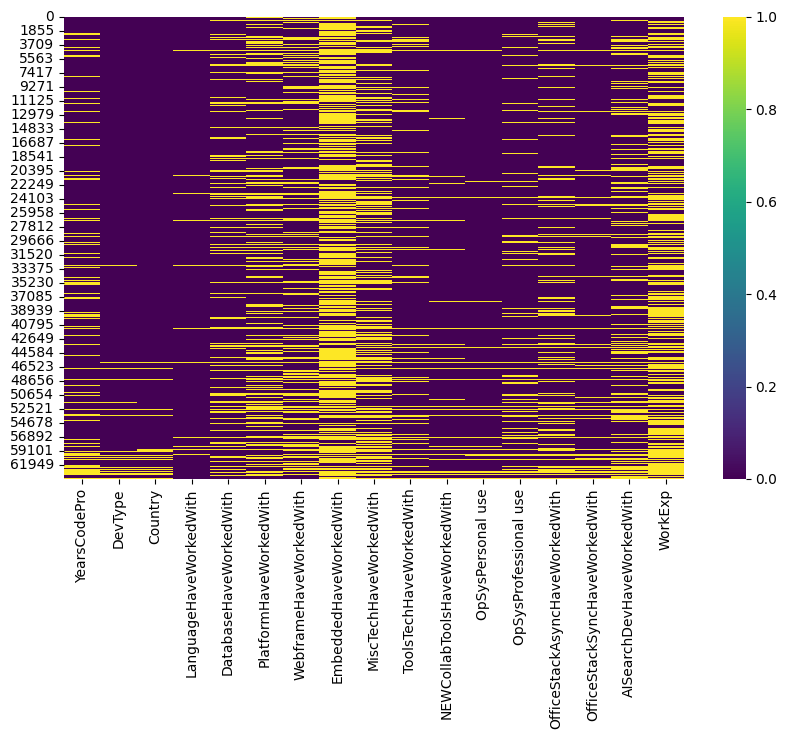

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [22]:
df['DevType'].unique()

array([nan, 'Developer, full-stack', 'Developer Experience', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

In [23]:
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [38]:
nonword_check = df['Country'].str.contains(r'[^A-Za-z\s]', regex = True)   
df[nonword_check == True]['Country'].value_counts()

Country
Iran, Islamic Republic of...             411
Hong Kong (S.A.R.)                       146
Venezuela, Bolivarian Republic of...      69
Côte d'Ivoire                             14
Congo, Republic of the...                  8
Lao People's Democratic Republic           4
Democratic People's Republic of Korea      2
Guinea-Bissau                              2
Micronesia, Federated States of...         1
Name: count, dtype: int64

In [ ]:
splitted_columns = []

In [19]:
def split_columns(df, cols_names, separator = ';'):
    split_cols = df[cols_names].str.split(separator, expand = True)
    df = pd.concat([df, split_cols], axis = 1)
    return df

In [ ]:
df = split_columns(df, )